<a href="https://colab.research.google.com/github/RamanEbrahimi/ComputationalPhysics/blob/main/3D_RandomWalk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

backtracking...
went back 16 steps
current length 2061
backtracking...
went back 21 steps
current length 2071
backtracking...
went back 8 steps
current length 2121
backtracking...
went back 3 steps
current length 4341
backtracking...
went back 13 steps
current length 5811
<class 'list'>


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:217: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:220: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:223: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.


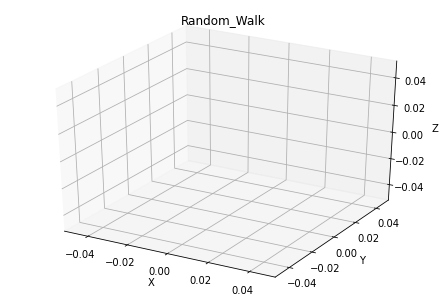

In [ ]:
import random
import math


import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation

#np.random.seed(19680801)
global tmax

def Gen_RandLine(length, dims=2):
    global tmax
    tmax = 10000
    t = 0

    x = [0]
    y = [0]
    z = [0]


    t=0
    t_total = 0
    coodr = [[x[t],y[t],z[t]]]
    dist = 0
    left = True
    up  = True
    right = True
    down = True
    front = True
    behind = True
    while t < tmax:# and t_total < tmax:
    #    print(len(x) ,  len(y) , len(coodr))
        if [(x[t]-1),y[t],z[t]] in coodr:
            left = False
        else:
            left = True
        if [(x[t]+1),y[t],z[t]] in coodr:
            right = False
        else:
            right = True
        if [(x[t]),(y[t]+1),z[t]] in coodr:
            front = False
        else:
            front = True
        if [(x[t]),(y[t]-1),z[t]] in coodr:
            behind = False
        else:
            behind = True
        if [(x[t]),(y[t]),(z[t]+1)] in coodr:
            up = False
        else:
            up = True
        if [(x[t]),(y[t]),(z[t]-1)] in coodr:
            down = False
        else:
            down = True

        all_dir = [left, front,right, behind, up,  down]
    #    print(all_dir)
        available_dir = []
        i=0
        for dir in all_dir:
            if dir == True:
                available_dir.append(i)
            i=i+1
    #    print(available_dir)
        if t % 10 == 0:
            if len(available_dir) == 5:
                left_inf = []
                up_inf = []
                right_inf = []
                down_inf = []
                front_inf = []
                behind_inf = []
                for j in range(0,100):
                #for j in range(0, tmax):
                    left_inf.append([x[t]-j,y[t],z[t]] )
                    front_inf.append([x[t],y[t]+j,z[t]] )
                    right_inf.append([x[t]+j,y[t],z[t]] )
                    behind_inf.append([x[t],y[t]-j,z[t]] )
                    up_inf.append([x[t],y[t],z[t]+j] )
                    down_inf.append([x[t],y[t],z[t]-j] )
            #    left_inf_tuple = [tuple(lst) for lst in left_inf]
                left_inf_tuple = set(map(tuple, left_inf))
                up_inf_tuple = set(map(tuple, up_inf))
                right_inf_tuple = set(map(tuple, right_inf))
                down_inf_tuple = set(map(tuple, down_inf))
                front_inf_tuple = set(map(tuple, front_inf))
                behind_inf_tuple = set(map(tuple, behind_inf))
                coord_tuple = set(map(tuple, coodr))
            #    print("types")
            #    print(type(left_inf_tuple))
            #    print(type((coord_tuple)) )
            #    print((left_inf_tuple).intersection(coord_tuple))
                if  (left_inf_tuple).intersection(coord_tuple) == set():
                #if (any(i in left_inf_tuple for j in coord_tuple)):
                #    print(left_inf_tuple)
                #    print([x[t] , y[t]])
                #    print(coord_tuple)
                    #print(left_inf)
                #    print("left is safe")
                    safe_t = t
                elif  (up_inf_tuple).intersection(coord_tuple) == set():
                #    print("up is safe")
                    safe_t = t
                elif  (right_inf_tuple).intersection(coord_tuple) == set():
                #    print("right is safe")
                    safe_t = t
                elif  (down_inf_tuple).intersection(coord_tuple) == set():
                #    print("down is safe")
                    safe_t = t
                elif  (front_inf_tuple).intersection(coord_tuple) == set():
                #    print("front is safe")
                    safe_t = t
                elif (behind_inf_tuple).intersection(coord_tuple) == set():
                #    print("behind is safe")
                    safe_t = t


        #    safe_t = t
        #    print(t)
        #    print("tsafe = " + str(safe_t))
        if not available_dir:
            print("backtracking...")
            t_diff = t - safe_t
            t = safe_t
            print("went back " + str(t_diff) + " steps")
            coodr = coodr[:-(t_diff)]
            x = x[:-(t_diff)]
            y = y[:(-(t_diff))]
            z = z[:-(t_diff)]

            print("current length " + str(len(x)))
        else:
            chosen_dir = random.choice(available_dir)
            if chosen_dir == 0:
                x.append(x[t]-1)
                y.append(y[t])
                z.append(z[t])
            elif chosen_dir == 1:
                x.append(x[t])
                y.append(y[t]+1)
                z.append(z[t])
            elif chosen_dir == 2:
                x.append(x[t]+1)
                y.append(y[t])
                z.append(z[t])
            elif chosen_dir == 3:
                x.append(x[t])
                y.append(y[t]-1)
                z.append(z[t])
            elif chosen_dir == 4:
                x.append(x[t])
                y.append(y[t])
                z.append(z[t]+1)
            elif chosen_dir == 5:
                x.append(x[t])
                y.append(y[t])
                z.append(z[t]-1)


            cur_dist = x[t]*x[t]+y[t]*y[t]+z[t]*z[t]
            if cur_dist > dist:
                dist = cur_dist
            coodr.append([x[t],y[t],z[t]])
            t=t+1
        t_total = t_total + 1

#    lineData = np.empty((dims, length))
    #print("Linedata = ")
    #print(lineData)
#    lineData[:, 0] = np.random.rand(dims)
    #print("Linedata2 = ")
    #print(lineData)
    #for index in range(1, length):
        # scaling the random numbers by 0.1 so
        # movement is small compared to position.
        # subtraction by 0.5 is to change the range to [-0.5, 0.5]
        # to allow a line to move backwards.
        #step = ((np.random.rand(dims) - 0.5) * 0.1)
        #lineData[:, index] = lineData[:, index - 1] + step
        #print("Linedata = ")
        #print(lineData)
        #print(type(lineData))
    #print(coodr)
    #min = min(x+y+z)-1
#    max = max(x+y+z)+1
    #print(t)
    return np.array([x,y,z])#, np.int32)
    #return np.array([[0, 0, 0, 1,1,1],[0, 1, 2, 2,2,2],[0,0,0,0,1,2]], np.int32)
    #return lineData



def update_lines(num, dataLines, lines):
    for line, data in zip(lines, dataLines):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2, :num])
        #print(type(data[0:2, :num]))
    #    print(data[0:3, :num])
    #    print("123")
    #    print(data[0:3, :1])

        try:
        #    print(np.amin(data[0:3, :num]))
        #    print(np.amax(data[0:3, :num]))
            min = np.amin(data[0:3, :num])-1
            max = np.amax(data[0:3, :num])+1
        except:
            min = 0
            max = 0
    #    ax.set_xticks(range(len(xdata)))
    #    ax.set_yticks(range(len(ydata)))
        ax.set_xlim3d([min, max])
        ax.set_xlabel('X')

        ax.set_ylim3d([min, max])
        ax.set_ylabel('Y')

        ax.set_zlim3d([min, max])
        ax.set_zlabel('Z')


    #    ax.set_xlim([min(data[0:2, :num])-1, max(data[0:2, :num]+1])
    #    ax.set_ylim(min(data[0:2, :num])-1, data[0:2, :num]+1])
    return lines

# Attaching 3D axis to the figure
fig = plt.figure()
ax = p3.Axes3D(fig)

# Fifty lines of random 3-D lines
i=0
data = [Gen_RandLine(25, 3) for index in range(1)]
print(type(data))
#print(data)
for dat in data:
    #print("dat = " )#+ str(dat))
    #print(dat[2])
    #print("Shape of the array = ",np.shape(dat));
    #print("i = " + str(i))
    i = i+1

#data = np.array([[0, 0, 0, 1,1,1],[0, 1, 2, 2,2,2],[0,0,0,0,1,2]], np.int32)
#print(data)
#print(min)
#print(max)
min = -1
max = 1
# Creating fifty line objects.
# NOTE: Can't pass empty arrays into 3d version of plot()

lines = [ax.plot(dat[0, 0:1] , dat[1, 0:1], dat[2, 0:1])[0] for dat in data]
#lines = [ax.plot(dat[0] , dat[1], dat[2])[0] for dat in data]

#print(lines)
# Setting the axes properties
ax.set_xlim3d([min, max])
ax.set_xlabel('X')

ax.set_ylim3d([min, max])
ax.set_ylabel('Y')

ax.set_zlim3d([min, max])
ax.set_zlabel('Z')

ax.set_title('Random_Walk')

# Creating the Animation object
line_ani = animation.FuncAnimation(fig, update_lines, tmax,  fargs=(data, lines),
                                   interval=5, blit=False ,  repeat = False)

line_ani.save('3DRandomWalk.mp4')
plt.show()